<a href="https://colab.research.google.com/github/rakieciarz/ML_bootcamp_1/blob/main/L001E002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Przygotowanie danych - braki danych
- usuwanie rekordów z brakami // df.dropna()
- uzupełnianie braków stałą wartością // df.fillna()
- wytrenowanie modelu w celu uzupełnienia braków // odłożyć dane gdzie występują braki, wytrenować model i uzupełnić braki
- zastosowanie interpolacji(szeregi czasowe)
- dodanie nowej kategorii np. 'brak' (zmienna kategoryczna)

Uzupełnienie danych: from sklearn.impute import SimpleImputer

SimpleImputer: parametr missing_values przekazuje jakie brakujące dane chcemy uzupełnić, parametr strategy określa w jaki sposób uzupełnić dane:
- imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
- imputer.fit(df):
  - metoda .fit(df) zwróci wartość według określonych parametrów utworzonej instancji imputer
- imputer.transform(df)
  - metoda .transform(df) uzupełni braki określone w instcji imputer o wartość wyliczoną w metodzie .fit()

Uzupełnienie brakującej wartości o stałą wartość:

- imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.9)
- imputer.fit_transform(df)

Uzupełnienie brakujących wartości o najczęściej występującą wartość dla danej zmiennej:

- imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
- imputer.fit_transform(df)

In [2]:
import pandas as pd
import numpy as np
import sklearn
data ={
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}
df_raw = pd.DataFrame(data=data)
df_raw.head()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes


In [3]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [4]:
 df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [5]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [6]:
df.isnull().sum().sum()

5

In [8]:
df.isnull().sum()/len(df)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])
imputer.statistics_

array([415.])

In [11]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.99)
imputer.fit_transform(df[['price']])

array([[199.  ],
       [ 89.  ],
       [ 99.99],
       [129.  ],
       [ 79.  ],
       [ 89.  ]])

In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [15]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [16]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [21]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [22]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


BRAKI DANYCH W SZERGACH CZASOWYCH

In [23]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)
df_raw = pd.DataFrame(data=data, index = date_range)
df_raw

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


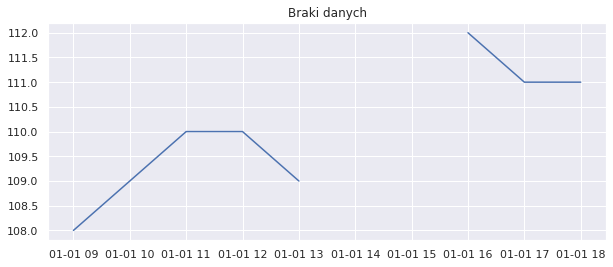

In [25]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize = (10,4))
plt.title('Braki danych')
_ = plt.plot(df_raw)

In [32]:
import plotly.express as px
df_plotly = df_raw.reset_index().copy()
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - braki danych')

In [33]:
df_plotly = df_plotly = df_raw.reset_index().copy().fillna(0)
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - braki danych fillna(0)')

In [37]:
df_plotly = df_plotly = df_raw.reset_index().copy().fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - braki danych fillna(0)')

In [ ]:
df_plotly = df_plotly = df_raw.reset_index().copy()